In [ ]:
import os
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


from google.colab import drive

data_dir = '/content/content/MyDrive/data/titanic'

drive.mount('content')
os.chdir(data_dir)
os.listdir()

# __Train, Test and Validation split__
- Evaluating model performance is essential to ensure reliable predictions and avoid overfitting.  
- Splitting data into training, testing, and validation sets enables rigorous model evaluation.  
- Training data (80%) helps the model learn patterns and relationships in the dataset.  
- Testing data (15%) evaluates the model's ability to generalize to unseen data.  
- Validation data (5%) fine-tunes hyperparameters and ensures consistent performance across datasets.  
- Scikit-learn’s `train_test_split` function is used twice to achieve the desired dataset splits.  
- Step-by-step splitting creates training, validation, and testing sets to optimize the workflow.  

In [11]:
df_train_1hot = pd.read_csv('train_1hot.csv')
df_test_1hot = pd.read_csv('test_1hot.csv')

In [12]:
df_train_1hot.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Binned_Child,Age_Binned_Adult,Age_Binned_Senior,Survived
0,0,0,1,0,1,0,0,1,0,1,0,0
1,1,0,0,1,0,1,0,0,0,1,0,1
2,0,0,1,1,0,0,0,1,0,1,0,1
3,1,0,0,1,0,0,0,1,0,1,0,1
4,0,0,1,0,1,0,0,1,0,1,0,0


In [13]:
df_test_1hot.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Binned_Child,Age_Binned_Adult,Age_Binned_Senior
0,0,0,1,0,1,0,1,0,0,1,0
1,0,0,1,1,0,0,0,1,0,1,0
2,0,1,0,0,1,0,1,0,0,0,1
3,0,0,1,0,1,0,0,1,0,1,0
4,0,0,1,1,0,0,0,1,0,1,0


In [14]:
# First split: Divide original data into training and testing
X_train, X_test, y_train, y_test = train_test_split(df_train_1hot.drop(columns=['Survived']),
                                                    df_train_1hot['Survived'],
                                                    test_size=0.2,
                                                    random_state=42)

# Second split: Further split X_test and y_test into test and validation sets
X_test, X_validate, y_test, y_validate = train_test_split(X_test,
                                                          y_test,
                                                          test_size=0.25,
                                                          random_state=42)

In [15]:
print(df_train_1hot.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_validate.shape, y_validate.shape)

(891, 12)
(712, 11) (712,)
(134, 11) (134,)
(45, 11) (45,)


In [16]:
# Initialize the Logistic Regression model
log_model = LogisticRegression(max_iter=1000)

# Fit the model using the training data
log_model.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = log_model.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluate the model on the validation set
y_validate_pred = log_model.predict(X_validate)

# Calculate validation accuracy
validate_accuracy = accuracy_score(y_validate, y_validate_pred)
print(f"Validation Accuracy: {validate_accuracy:.2f}")

# Evaluate the model on the testing set
y_test_pred = log_model.predict(X_test)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.79
Validation Accuracy: 0.78
Test Accuracy: 0.79


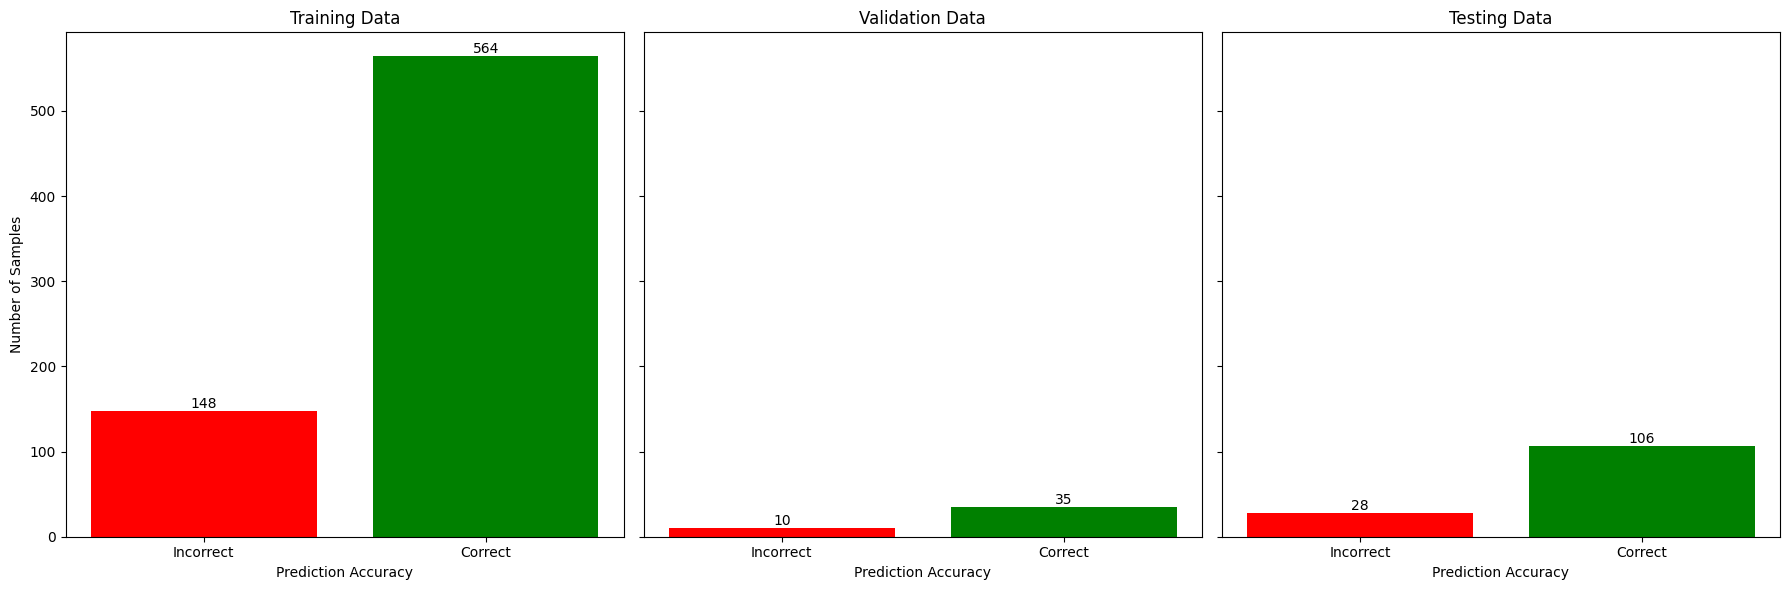

In [17]:
# Combine results for training, validation, and testing
train_results_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
train_results_df['Match'] = train_results_df['Actual'] == train_results_df['Predicted']
train_match_counts = train_results_df['Match'].value_counts()

validate_results_df = pd.DataFrame({'Actual': y_validate, 'Predicted': y_validate_pred})
validate_results_df['Match'] = validate_results_df['Actual'] == validate_results_df['Predicted']
validate_match_counts = validate_results_df['Match'].value_counts()

test_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
test_results_df['Match'] = test_results_df['Actual'] == test_results_df['Predicted']
test_match_counts = test_results_df['Match'].value_counts()

# Create subplots for training, validation, and testing
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Training subplot
bars = axes[0].bar(train_match_counts.index, train_match_counts.values, color=['green', 'red'], tick_label=['Correct', 'Incorrect'])
axes[0].set_title('Training Data')
axes[0].set_xlabel('Prediction Accuracy')
axes[0].set_ylabel('Number of Samples')
for bar in bars:
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height()}", ha='center', va='bottom')

# Validation subplot
bars = axes[1].bar(validate_match_counts.index, validate_match_counts.values, color=['green', 'red'], tick_label=['Correct', 'Incorrect'])
axes[1].set_title('Validation Data')
axes[1].set_xlabel('Prediction Accuracy')
for bar in bars:
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height()}", ha='center', va='bottom')

# Testing subplot
bars = axes[2].bar(test_match_counts.index, test_match_counts.values, color=['green', 'red'], tick_label=['Correct', 'Incorrect'])
axes[2].set_title('Testing Data')
axes[2].set_xlabel('Prediction Accuracy')
for bar in bars:
    axes[2].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height()}", ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
print(f'{35/45 :.2f}')

0.78


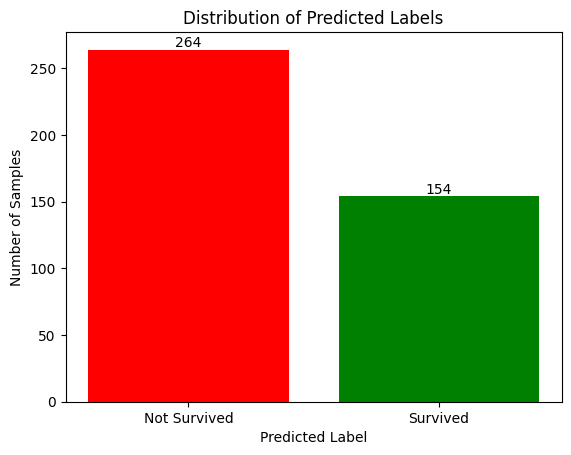

In [19]:
# Use the trained model to make predictions
predicted_values = log_model.predict(df_test_1hot)

# Count survived and not survived predictions
survived_count = sum(predicted_values == 1)
not_survived_count = sum(predicted_values == 0)

# Plot bar chart for predictions
bars = plt.bar(['Not Survived', 'Survived'], [not_survived_count, survived_count], color=['red', 'green'])

# Add labels on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height()}", ha='center', va='bottom')

# Add title and labels for axes
plt.title('Distribution of Predicted Labels')
plt.xlabel('Predicted Label')
plt.ylabel('Number of Samples')

# Display the plot
plt.show()

# __K-fold cross validation__
- Model performance evaluation is crucial to ensure reliability and minimize overfitting and underfitting.  
- Cross-validation divides the dataset systematically, enhancing generalization and efficient data utilization.  
- K-fold cross-validation splits data into k folds, averaging metrics for a thorough assessment.  
- The KFold class in Scikit-learn facilitates the implementation of k-fold cross-validation.  
- Logistic regression is trained on k-1 folds, with the remaining fold used for validation.  
- Accuracy for each fold is recorded, ensuring balanced evaluation across all subsets.  
- Average accuracy highlights consistent model reliability and generalization to unseen data.  

In [20]:
from sklearn.model_selection import KFold

# Separate features and target from df_train_1hot
X = df_train_1hot.drop(columns=['Survived'])  # Replace 'Survived' with the target column name
y = df_train_1hot['Survived']

# Initialize KFold with 5 splits
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize logistic regression model
log_model = LogisticRegression(max_iter=1000)

# Placeholder to store accuracy for each fold
accuracy_scores = []

# Perform k-fold cross-validation
fold_number = 1
for train_index, validate_index in kf.split(X):
    # Split the data into training and validation sets
    X_train, X_validate = X.iloc[train_index], X.iloc[validate_index]
    y_train, y_validate = y.iloc[train_index], y.iloc[validate_index]

    # Train the model
    log_model.fit(X_train, y_train)

    # Validate the model
    y_validate_pred = log_model.predict(X_validate)
    accuracy = accuracy_score(y_validate, y_validate_pred)
    accuracy_scores.append(accuracy)

    # Print accuracy for this fold
    print(f"Fold {fold_number} Accuracy: {accuracy:.2f}")
    fold_number += 1

# Calculate the average accuracy
average_accuracy = sum(accuracy_scores) / k
print(f"Average Accuracy Across {k} Folds: {average_accuracy:.2f}")

Fold 1 Accuracy: 0.79
Fold 2 Accuracy: 0.78
Fold 3 Accuracy: 0.84
Fold 4 Accuracy: 0.74
Fold 5 Accuracy: 0.80
Average Accuracy Across 5 Folds: 0.79
